<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/robot_position_and_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

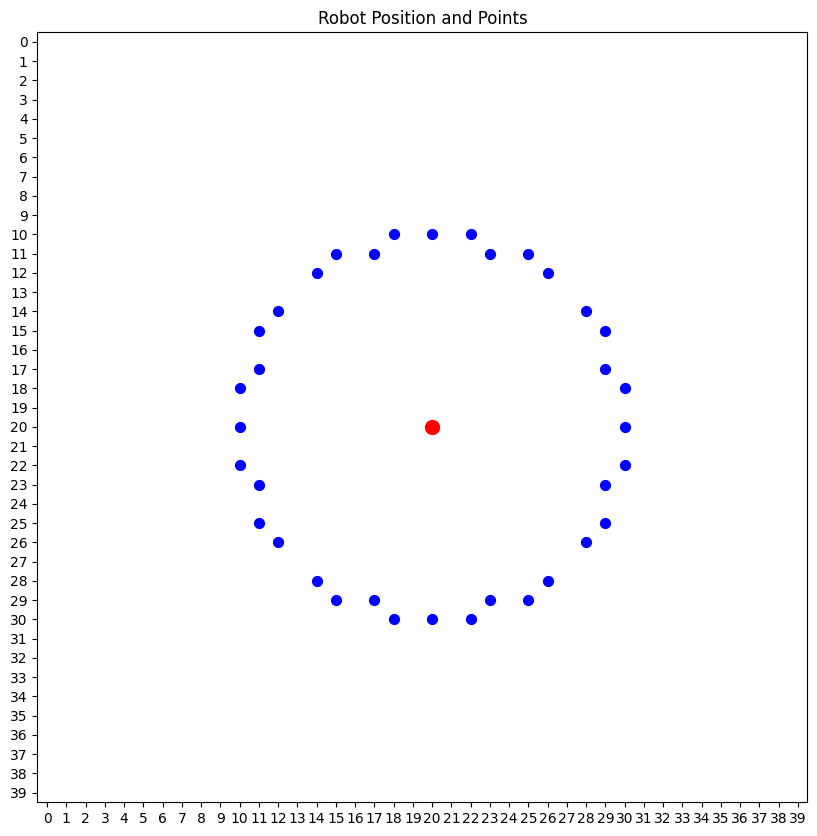

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Параметры
distance_cm = 1000    # Дистанция в сантиметрах
scale = 100          # Масштаб: 1 клетка = 100 см
array_size = 40      # Размер массива

# Создание пустого массива для хранения точек
points = []

# Центр массива (позиция робота)
robot_position = (array_size // 2, array_size // 2)

# Проход по углам от 0 до 360 градусов
for angle_degrees in range(0, 360, 10):  # Изменяем шаг, если нужно больше точек
    # Преобразование угла в радианы
    angle_radians = math.radians(angle_degrees)

    # Расчет координат
    distance_cells = distance_cm / scale  # Преобразование дистанции в клетки
    dx = distance_cells * math.cos(angle_radians)  # Смещение по x
    dy = distance_cells * math.sin(angle_radians)  # Смещение по y

    # Расчет координат точки в массиве
    point_x = int(round(robot_position[0] + dx))
    point_y = int(round(robot_position[1] - dy))  # Обратите внимание на знак минус для y

    # Добавление точки в список, если она в пределах массива
    if 0 <= point_x < array_size and 0 <= point_y < array_size:
        points.append((point_x, point_y))

# Визуализация результата
plt.figure(figsize=(10, 10))

# Отображаем робота (красная точка)
plt.scatter(*robot_position[::-1], color='red', s=100)

# Отображаем точки (синие точки)
if points:
    x_indices, y_indices = zip(*points)
    plt.scatter(x_indices, y_indices, color='blue', s=50)

# Настройки графика
plt.xlim(-0.5, array_size - 0.5)
plt.ylim(array_size - 0.5, -0.5)  # Инвертируем ось Y для правильного отображения
plt.xticks(range(array_size))
plt.yticks(range(array_size))
plt.grid(False)
plt.gcf().patch.set_facecolor('white')  # Устанавливаем белый фон графика
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Robot Position and Points')
plt.show()
